Exercise 3: Monte Carlo

1. Sample the configurations of a particle in 1D subject to a harmonic potential U(x)=1/2 kq^2 at temperature kT=1.

Moves should be proposed using random numbers uniformly distributed in [−∆, +∆] and accepted or rejected with a Metropolis procedure.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rm

In [2]:
# uniform distribution [-delta,+delta]
def trial(x,delta):
    return x+(rm.random()*2-1)*delta

In [3]:
# potential energy
def u(x,k=1):
    return 1/2*k*x**2

In [111]:
def run(*,kT=1,delta=1,nsteps=100,q=0.1):

    traj=[]
    time=[]
    q2mean=0
    avalpha=0


#q=0.1
    traj.append(q)
    time.append(0)
    u0=u(q)

    for istep in range(nsteps):
        qtry=trial(q,delta)
        utry=u(qtry)
        alpha=np.exp(-(utry-u0)/kT)
        # if alpha>1: alpha=1
        if alpha>rm.random():
            avalpha+=1
            q=qtry
            u0=utry
        #trajectory.append(u)
        q2mean+=q**2
        traj.append(q)
        time.append(istep)

    avalpha=avalpha/nsteps
    q2mean=q2mean/nsteps
    

    return np.array(time),np.array(traj),avalpha,q2mean

average acceptance:  0.98155
position variance (q2 mean):  0.8243133071816803


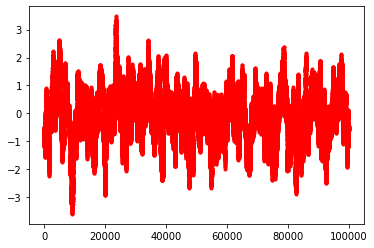

In [238]:
time,traj,avalpha,q2mean=run(q=-0.5,delta=0.1,nsteps=100000)
print('average acceptance: ',avalpha)
print('position variance (q2 mean): ',q2mean)
plt.plot(time,traj,'.r',label='trajectory')

Try different values of ∆ (e.g. ∆ = 0.01, 0.1, 1) and different values of the initial condition q.

[0.011344463964435636, 0.08092173965745092, 1.3078048541841893]
[1.0, 0.9997, 0.9745]


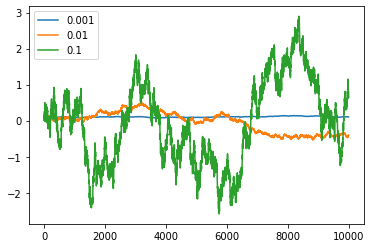

In [153]:
q2s=[]
q2stds=[]
avalphas=[]
nsteps=10000

for delta in (0.001,0.01,0.1):  
    time,traj,avalpha,q2=run(delta=delta,nsteps=nsteps)
    avalphas.append(avalpha)
    q2s.append(np.mean(traj**2))
    q2stds.append(np.std(traj**2)/np.sqrt(nsteps))
    
    plt.plot(time,traj,'-',label=delta)
    
plt.legend(loc='upper left')

print(q2s)
print(avalphas)
# for delta=0.001, 0.01 you can see that (up to nsteps=10^5) Metropolis cannot sample a sufficient part of the phase
# space so q2 is not estimated correctly, like instead for delta=0.1

[0.42605876593331143, 0.28265264942084106, 0.5831835027124159, 0.8896752204541023, 10.241497317389957]
[0.0013465566550569037, 0.0011137319243214937, 0.0017815065608140668, 0.0024690636895255027, 0.02380542578660774]
[0.99873, 0.99893, 0.99826, 0.99765, 0.99271]


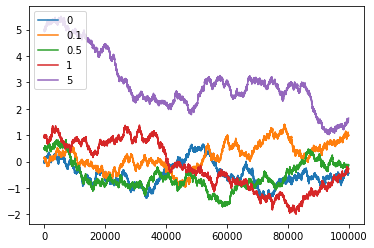

In [154]:
q2s=[]
q2stds=[]
avalphas=[]
nsteps=100000

for q0 in (0,0.1,0.5,1,5):  
    time,traj,avalpha,q2=run(q=q0,nsteps=nsteps,delta=0.01)
    avalphas.append(avalpha)
    q2s.append(np.mean(traj**2))
    q2stds.append(np.std(traj**2)/np.sqrt(nsteps))
    #q2s.append(q2)
    plt.plot(time,traj,'-',label=q0)
    
plt.legend(loc='upper left')

print(q2s)
print(q2stds)
print(avalphas)

[1.0603642664786486, 0.9981134928814268, 1.0927509615970117, 0.8961436194899428, 1.0406396979793289]


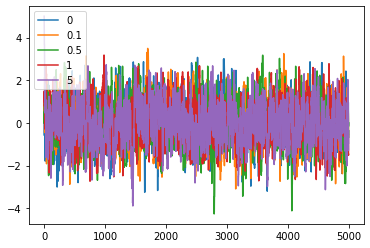

In [109]:
q2s=[]
avalphas=[]

for q0 in (0,0.1,0.5,1,5):  
    time,traj,avalpha,q2=run(q=q0,nsteps=5000,delta=1)
    avalphas.append(avalpha)
    q2s.append(q2)
    plt.plot(time,traj,'-',label=q0)
    
plt.legend(loc='upper left')

print(q2s)

# it seems quite independent from the choice of the initial position (??)

2. Plot the resulting trajectory (i.e. q as a function of the number of iteration) for different values of ∆.

Also compute the average acceptance as a function of ∆.

[0.012950027655809689, 0.011847875130906054, 0.029071046792667216, 0.029502204378569704, 0.6098635058331615, 1.2146763615747864, 0.5832408021618717, 1.0741799939800927, 0.9317151947127768, 1.0180321415649178]
[1.0, 0.9998, 0.9999, 0.9999, 0.9975, 0.9893, 0.9845, 0.9583, 0.9046, 0.8043]


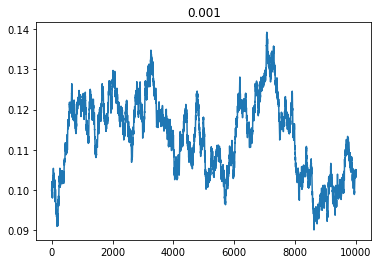

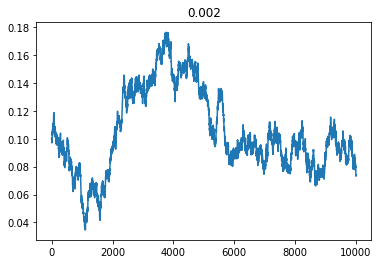

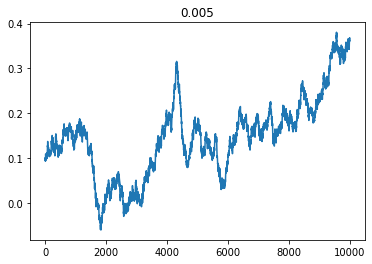

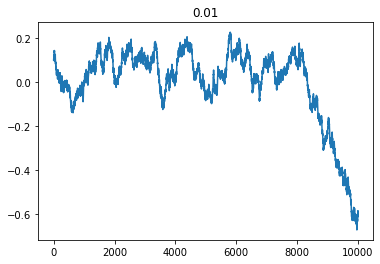

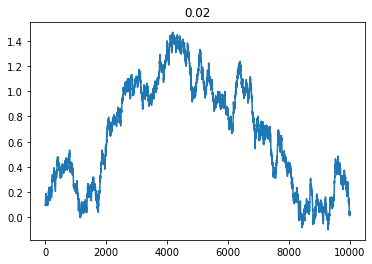

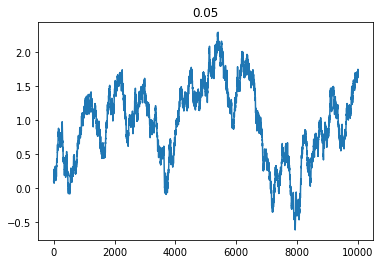

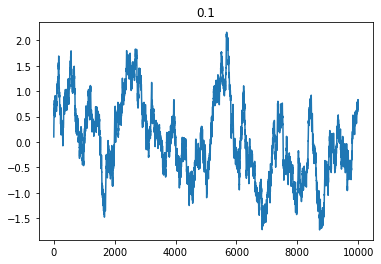

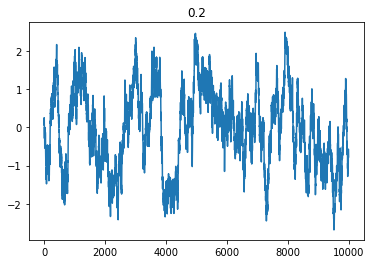

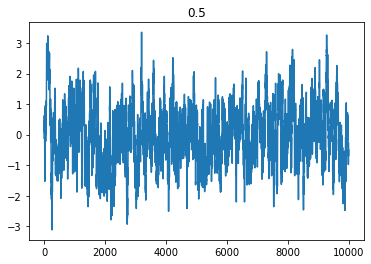

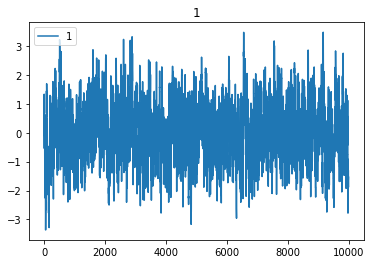

In [247]:
q2s=[]
q2stds=[]
avalphas=[]
nsteps=10000
deltas=(0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1)

for delta in (0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1):  
    time,traj,avalpha,q2=run(delta=delta,nsteps=nsteps)
    avalphas.append(avalpha)
    q2s.append(np.mean(traj**2))
    q2stds.append(np.std(traj**2)/np.sqrt(nsteps))
    
    plt.figure()
    plt.plot(time,traj,'-',label=delta)
    plt.title(delta)
    
    
plt.legend(loc='upper left')

print(q2s)
print(avalphas)
# for delta=0.001, 0.01 you can see that (up to nsteps=10^5) Metropolis cannot sample a sufficient part of the phase
# space so q2 is not estimated correctly, like instead for delta=0.1

[-0.19602257  1.00081906]


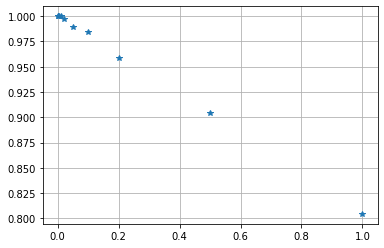

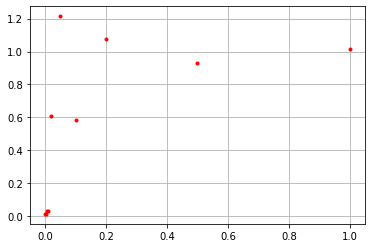

In [252]:
# plot of alpha(delta) and (average) q^2(delta) for nsteps and q0 fixed
plt.figure(1)
plt.plot(deltas,avalphas,'*')
plt.grid(axis='both')
plt.figure(2)
plt.plot(deltas,q2s,'.r')
plt.grid(axis='both')

z=np.polyfit(deltas,avalphas,1)
print(z)

In [142]:
q2s=[]
avalphas=[]
q2=0
niter=1000
l=1

for icount in range(niter):
    time,traj,avalpha,q2=run(delta=2)#q=l*rm.random())
    q2s.append(q2)
    avalphas.append(avalpha)

q2mean=np.mean(q2s)
q2std=np.std(q2s)/np.sqrt(niter)
print(q2mean)
print(q2std)
avalphamean=np.mean(avalphas)
avalphastd=np.std(avalphas)/np.sqrt(niter)
print(avalphamean)
print(avalphastd)

0.9997229887936221
0.009592078818692092
0.6303800000000002
0.0015063384745799997


Fix the number of iterations niter and change delta: how does the acceptance and q2 depend on delta?
Initial condition q(0)=0 (minimum of the potential)

In [52]:
deltas="0.001 0.01 0.1 1".split()
ndeltas=4

q2s=[]
avalphas=[]
niter=100 #000

for jcount in range(ndeltas):
    delta=deltas[jcount]
    for icount in range(niter):
        time,traj,avalpha,q2=run(delta=delta)
        q2s[jcount,icount]+=q2
        avalphas[jcount,icount]+=avalpha

q2mean=np.mean(q2s)
q2std=np.std(q2s)/np.sqrt(niter)
print(q2mean)
print(q2std)

TypeError: can't multiply sequence by non-int of type 'float'

3. Compute the average value of q2. Check how many iterations you need to reach an estimate of this integral
with a given accuracy. How is the accuracy scaling with the length of
the simulation? 

[0.9931810550846, 0.9470350285940041, 0.9927006723043285, 1.0194446407127784, 0.984250891223677, 0.9990037330263113, 0.9992517001958496, 1.0010066923531817, 1.0025364373151446, 1.0004020505798457, 0.9949743147170358, 0.9948052009558045, 1.0002980502784373]
[0.006818944915400027, 0.052964971405995875, 0.0072993276956715425, 0.019444640712778405, 0.015749108776322962, 0.0009962669736887086, 0.0007482998041503652, 0.0010066923531817373, 0.002536437315144635, 0.0004020505798456586, 0.00502568528296421, 0.005194799044195508, 0.0002980502784373229]
[0.05227958635368526, 0.026785935309439547, 0.022861905649445114, 0.020710005967684356, 0.01330411035387572, 0.013544795891429404, 0.01091897526586735, 0.008992493327582556, 0.005614143293637434, 0.006761279179505036, 0.004786831630803986, 0.004613385634870059, 0.0032258229778000065]


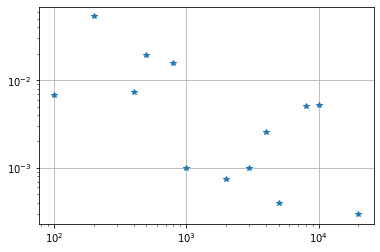

In [194]:
avalphas=[]
stdalphas=[]
avq2s=[]
error=[]
stdq2s=[]
nsteps=(100,200,400,500,800,1000,2000,3000,4000,5000,8000,10000,20000)#,50000,100000)#,1000000)
delta=1
niter=100

for nstep in nsteps:
    q2s=[]
    alphas=[]
    for icount in range(niter):
        time,traj,avalpha,q2=run(delta=delta,nsteps=nstep)
        alphas.append(avalpha)
        q2s.append(np.mean(traj**2))
    avalphas.append(np.mean(alphas))
    stdalphas.append(np.std(alphas)/np.sqrt(niter))
    avq2s.append(np.mean(q2s))
    error.append(np.abs(1-np.mean(q2s)))
    stdq2s.append(np.std(q2s)/np.sqrt(niter))
    
    
#plt.legend(loc='upper left')

print(avq2s)
print(error)
print(stdq2s)
#print(avalphas)
#print(stdalphas)

plt.plot(nsteps,error,'*')
plt.grid(axis='both')
plt.xscale('log')
plt.yscale('log')
# for delta=0.001, 0.01 you can see that (up to nsteps=10^5) Metropolis cannot sample a sufficient part of the phase
# space so q2 is not estimated correctly, like instead for delta=0.1

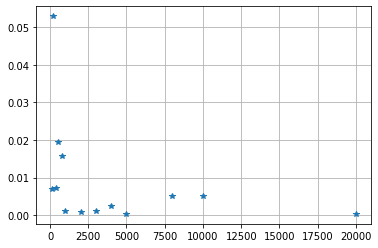

In [195]:
plt.plot(nsteps,error,'*')
plt.grid(axis='both')

[0.008338077549730934, 0.0077776971034460955, 0.02349666204502136, 0.03678068250842325, 0.0357016407057207, 0.0983358145811034, 1.6002789852747599, 3.626360995665327, 0.9538835384420862, 0.8231168664201922, 0.9692965691704037, 0.9877359093660035, 1.2191679535972393, 0.9887834384770384]
[1.0, 1.0, 1.0, 1.0, 1.0, 0.998, 0.978, 0.92, 0.896, 0.836, 0.636, 0.504, 0.412, 0.286]


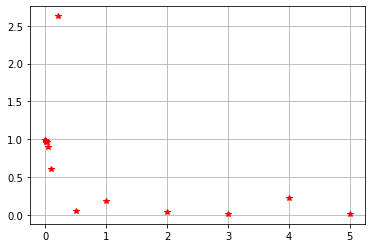

In [244]:
# How does the error depend on the choice of delta?
q2s=[]
error=[]
q2stds=[]
avalphas=[]
nsteps=500
deltas=(0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,3,4,5)

for delta in deltas:  
    time,traj,avalpha,q2=run(delta=delta,nsteps=nsteps)
    avalphas.append(avalpha)
    q2s.append(np.mean(traj**2))
    error.append(np.abs(1-np.mean(traj**2)))
    q2stds.append(np.std(traj**2)/np.sqrt(nsteps))
    
    #plt.plot(time,traj,'-',label=delta)
    
#plt.legend(loc='upper left')

print(q2s)
plt.plot(deltas,error,'*r')
plt.grid(axis='both')
#plt.yscale('log')
print(avalphas)
# for delta=0.001, 0.01 you can see that (up to nsteps=10^5) Metropolis cannot sample a sufficient part of the phase
# space so q2 is not estimated correctly, like instead for delta=0.1